### Student Information
Name: 王豐連

Student ID: 105061237

GitHub ID: Fenglien

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# 1. Take Home Exercises 

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

In [5]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home): 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

### Answer here

Query the text of the dataset and print it out.

In [6]:
print(X.text)

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
5       From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6       From: jodfishe@silver.ucs.indiana.edu (joseph ...
7       From: aldridge@netcom.com (Jacquelin Aldridge)...
8       From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9       From: libman@hsc.usc.edu (Marlena Libman) Subj...
10      From: anasaz!karl@anasazi.com (Karl Dussik) Su...
11      From: amjad@eng.umd.edu (Amjad A Soomro) Subje...
12      From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
13      Subject: So what is Maddi? From: madhaus@netco...
14      From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
15      From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...
16      From: texx@ossi.com (Robert "Texx" Woodworth) ...
17      Organi

Interchange the contents of 'text' and 'category'.

In [7]:
X[['text', 'category']] = X[['category', 'text']]
X[:10]

,text,category,category_name
0,1,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,3,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,3,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,3,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,3,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,2,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,2,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,2,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


And then change them back to the original one.

In [8]:
X[['text', 'category']] = X[['category', 'text']]
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
The 'NaN', 'None' are actually strings, so they are not considered to be missing values under the examination.

In [11]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer here

The sample function performs random sampling to original dataset. It can be observed that the samples distribution is similar to the original dataset, but not exactly the same. 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

### Answer here

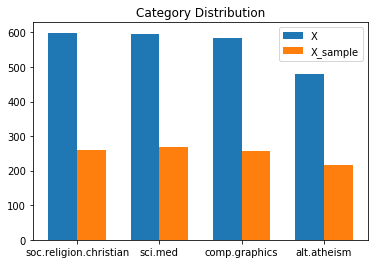

In [13]:
fig, ax = plt.subplots()
X_means = dict(X.category_name.value_counts())
X_sample_means = dict(X_sample.category_name.value_counts())

if list(dict(X.category_name.value_counts()).keys()) != list(dict(X_sample.category_name.value_counts()).keys()):
    temp = {} 
    for key in list(dict(X.category_name.value_counts()).keys()): 
        temp.update({key:X_sample_means[key]})
    X_sample_means = temp

A = np.arange(len(X_means))
width = 0.35

rects1 = ax.bar(A - width/2, list(X_means.values()), width, label='X')
rects2 = ax.bar(A + width/2, list(X_sample_means.values()), width, label='X_sample')

ax.set_title('Category Distribution')
ax.set_xticks(A)
ax.set_xticklabels(list(X_means.keys()))
ax.legend()
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

### Answer here

In [15]:
i, = np.where(X_counts[4, 0:100].toarray().reshape(-1)==1)
print(count_vect.get_feature_names()[i[1]])

01


First, I search the location where the nonzero values occur, then I use that index to query the word, which is '01' in this example.

In [16]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

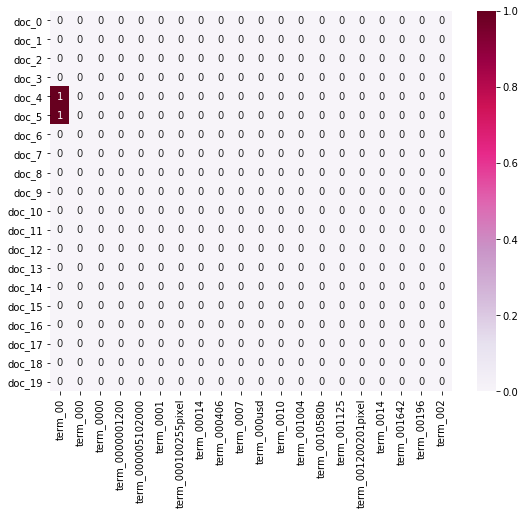

In [17]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer here

In [18]:
index = np.transpose(np.nonzero(X_counts))[:,1].astype(int)

for i in range(np.transpose(np.nonzero(X_counts)).shape[0]):
    print('{} -> {}'.format(np.transpose(np.nonzero(X_counts))[i], count_vect.get_feature_names()[index[i]]))
    if i==100:
        break

[  0 230] -> 0hb
[    0 12541] -> ec1v
[   0 3166] -> 8565
[    0 14085] -> fax
[    0 20459] -> london
[    0 35416] -> x3769
[   0 3062] -> 8000
[   0 2326] -> 477
[  0 177] -> 071
[    0 31915] -> tel
[    0 33572] -> unit
[   0 9338] -> computer
[    0 26175] -> programmer
[   0 4378] -> advance
[    0 17556] -> in
[    0 32135] -> thanks
[    0 15837] -> group
[   0 9932] -> correct
[    0 32270] -> this
[    0 18474] -> is
[    0 27836] -> response
[   0 5195] -> any
[    0 12833] -> email
[    0 25337] -> please
[    0 25361] -> plotter
[    0 16927] -> hpgl
[    0 28619] -> same
[    0 12014] -> do
[    0 20198] -> like
[   0 4808] -> also
[    0 35312] -> would
[    0 34775] -> we
[    0 14676] -> format
[    0 18268] -> into
[    0 14281] -> files
[    0 32116] -> tga
[    0 17389] -> img
[    0 32391] -> tif
[   0 9801] -> convert
[    0 33915] -> utility
[    0 24677] -> pd
[   0 5285] -> application
[    0 24651] -> pc
[    0 30623] -> standard
[    0 34755] -> way
[    0 

The results only shows the nonzero values of the entire document matrix to reduce the dimentionality.
The first element of each list represents the number of record, and the second element represents the word index in corresponding to the right-most word.

In [19]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### Answer here

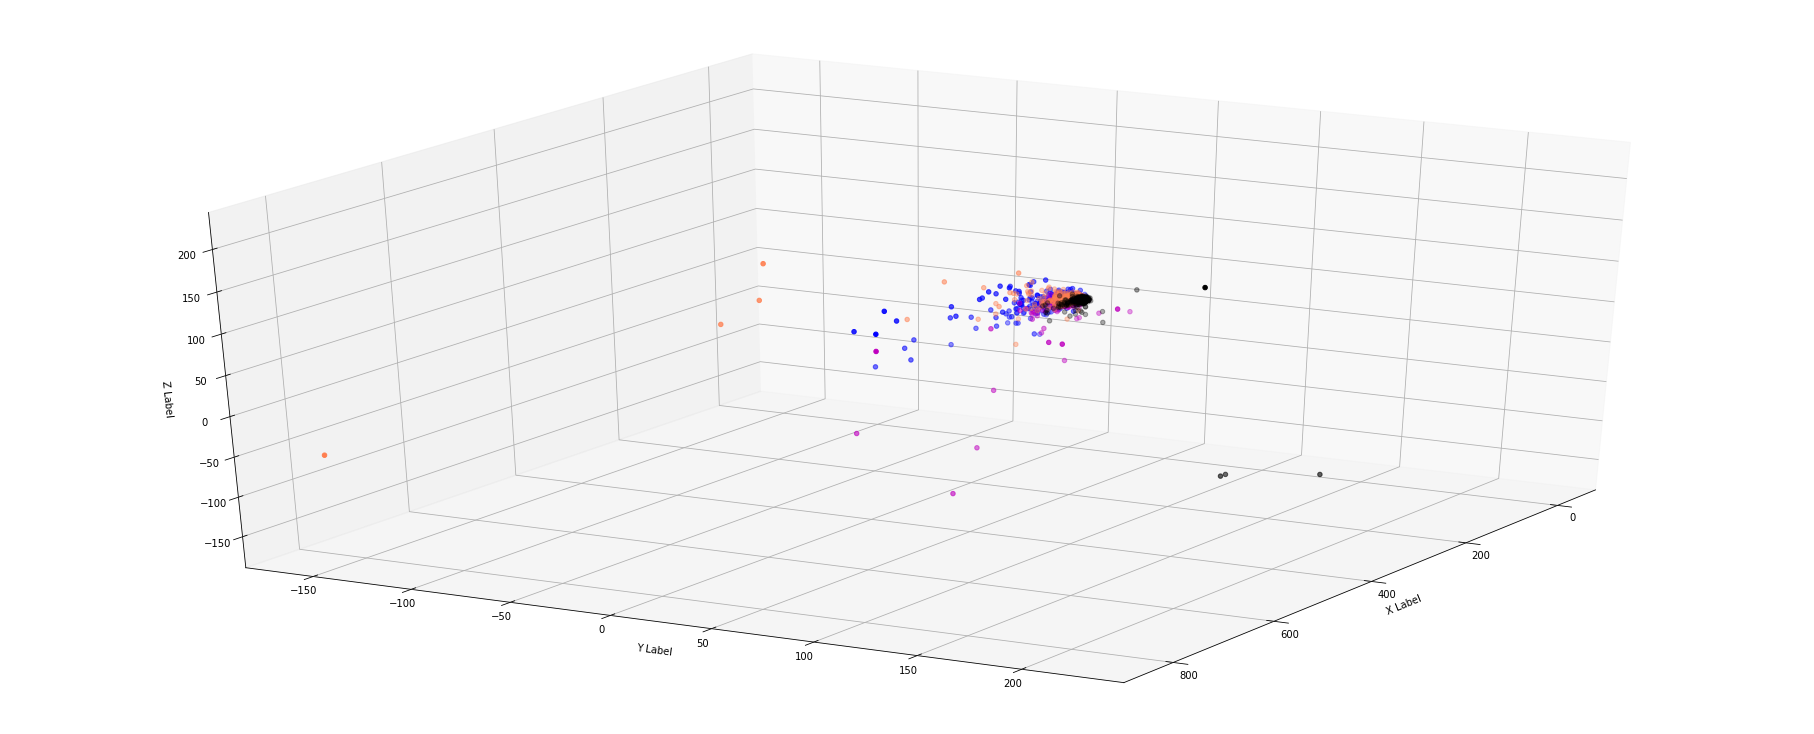

In [20]:
from mpl_toolkits.mplot3d import Axes3D
X_reduced3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig,azim=30,elev=30)

for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[0]
    ys = X_reduced3D[X['category_name'] == category].T[1]
    zs = X_reduced3D[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [21]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [22]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

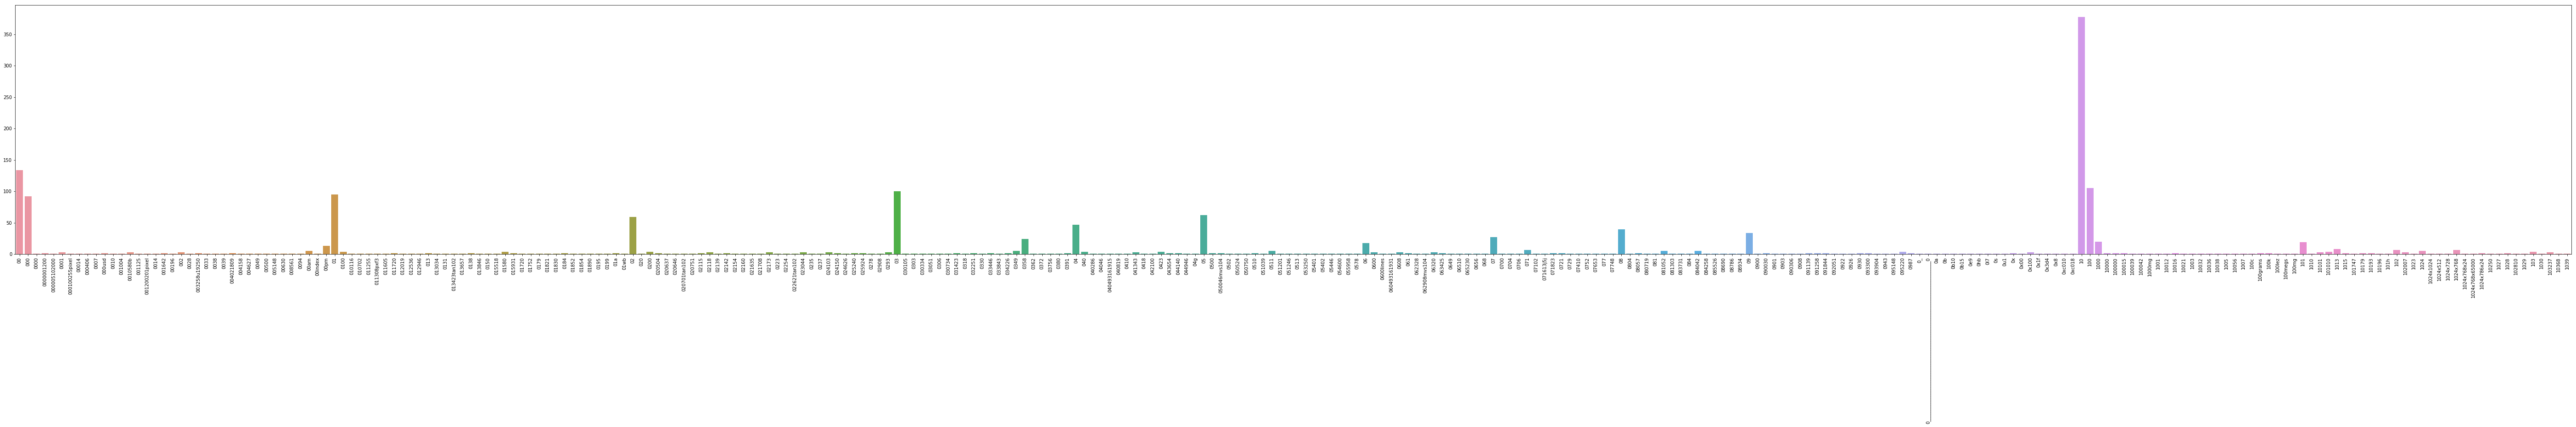

In [23]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [24]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

fig = [go.Bar(
            x=np.asarray((count_vect.get_feature_names())[5000:5050]),
            y=term_frequencies[5000:5050]
    )]

iplot(fig)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### Answer here

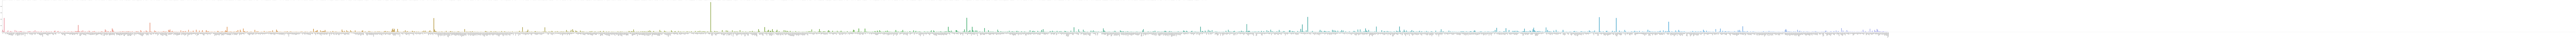

In [25]:
from nltk.corpus import stopwords

D = dict(zip(count_vect.get_feature_names(),list(term_frequencies)))

np.average(term_frequencies)

dict(zip(count_vect.get_feature_names()[:10],list(term_frequencies)[:10]))
temp = {}
for k in D.keys():
    if D[k] > np.average(term_frequencies):
        temp.update({k:D[k]})

NoStop = [word for word in list(temp.keys()) if word not in stopwords.words('english')]

filter_words = []
for i in NoStop:
    k = ''.join(j for j in i if not j.isdigit())
    if k and k.isalpha():
        filter_words.append(k)

result = {}
for i in filter_words:
    if i in temp:
        result.update({i:temp[i]})

plt.subplots(figsize=(800, 10))
g = sns.barplot(x=list(result.keys()), 
            y=list(result.values()))
g.set_xticklabels(list(result.keys()), rotation = 90);

First, I remove the words which frequency is lower than the average term frequency. Then, I remove the elements that contains number because they are not vocabularies. After data cleaning, the number of elements will be about 3000, which is much lower than 30000 elements contained in the original document matrix.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer here

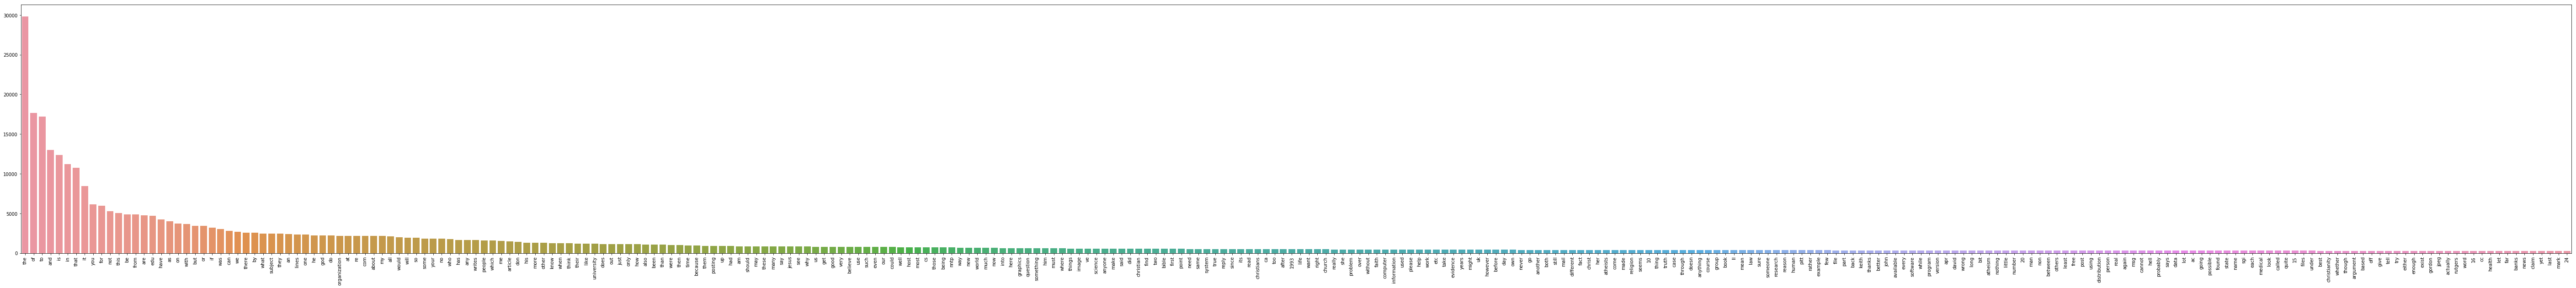

In [26]:
features = count_vect.get_feature_names()
frequencies = term_frequencies
d = dict(zip(features, frequencies))
result = sorted(d.items(), key=lambda d: d[1], reverse=True) 
sort_features = []
sort_frequencies = []
for i in result:
    sort_features.append(i[0])
    sort_frequencies.append(i[1])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x= sort_features[:300], 
            y=sort_frequencies[:300])
g.set_xticklabels(sort_features[:300], rotation = 90);


In [27]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer here

In [28]:
M = preprocessing.LabelBinarizer()
M.fit(X.category_name)
M.classes_
X['bin_category_name'] = M.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# 2. The New Dataset

## Data Preparation, Transformation and Feature Creation

Download the prepared datasets, combine them altogether and transform them to a pandas dataframe.
Meanwhile, a new feature called 'category' is created and appended to this dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = './sentiment labelled sentences/sentiment labelled sentences/'
data_list = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
website = ['amazon','imdb','yelp']
df = pd.DataFrame()
i = 0
for data in data_list:
    d = pd.read_csv(data_path + data, sep ='\t', header = None)
    d['category'] = website[i]
    df = df.append(d, ignore_index = True)
    i += 1
df.columns = ['text','label','category']
print(df)

                                                   text  label category
0     So there is no way for me to plug it in here i...      0   amazon
1                           Good case, Excellent value.      1   amazon
2                                Great for the jawbone.      1   amazon
3     Tied to charger for conversations lasting more...      0   amazon
4                                     The mic is great.      1   amazon
5     I have to jiggle the plug to get it to line up...      0   amazon
6     If you have several dozen or several hundred c...      0   amazon
7           If you are Razr owner...you must have this!      1   amazon
8                   Needless to say, I wasted my money.      0   amazon
9                      What a waste of money and time!.      0   amazon
10                      And the sound quality is great.      1   amazon
11    He was very impressed when going from the orig...      1   amazon
12    If the two were seperated by a mere 5+ ft I st...      0  

## Dealing with Missing Values

Find if there is any missing values in this dataset.

In [2]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text        (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

## Dealing with Duplicate Data

See how many duplicates appear in this dataset.

In [3]:
sum(df.duplicated())

17

Find which records are duplicates.

In [4]:
df[df.duplicated()]

,text,label,category
285,Great phone!.,1,amazon
407,Works great.,1,amazon
524,Works great!.,1,amazon
543,Don't buy this product.,0,amazon
744,If you like a loud buzzing to override all you...,0,amazon
748,Does not fit.,0,amazon
778,This is a great deal.,1,amazon
792,Great Phone.,1,amazon
892,Excellent product for the price.,1,amazon
896,Great phone.,1,amazon


The drop_duplicates function is used to eliminate those duplicates. The parameter "keep" is set to "first" so that it will drop duplicates except for the first occurrence. The parameter "inplace" is set to "True" so that this operation will directly affect the original dataframe.

In [5]:
df.drop_duplicates(keep='first', inplace=True)
df

,text,label,category
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


## Sampling

In [6]:
df_sample = df.sample(df.shape[0]//10)
len(df_sample)

273

In [7]:
df_sample[0:10]

,text,label,category
1457,Also great directing and photography.,1,imdb
1039,I don't think you will be disappointed.,1,imdb
3,Tied to charger for conversations lasting more...,0,amazon
1484,Kris Kristoffersen is good in this movie and r...,1,imdb
2631,I ordered Albondigas soup - which was just war...,0,yelp
1169,"The new characters weren't all that memorable,...",0,imdb
929,As I said above....PRETTY USELESS!,0,amazon
2425,The plantains were the worst I've ever tasted.,0,yelp
1620,"The acting, as you'd expect from this cast, is...",1,imdb
1401,Her lines seem to have been WRITTEN by a fifte...,0,imdb


Plot the sample category distribution below.

amazon    96
yelp      94
imdb      83
Name: category, dtype: int64


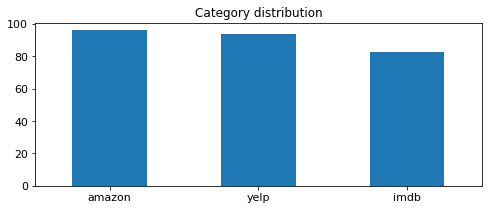

In [8]:
print(df_sample.category.value_counts())

df_sample.category.value_counts().plot(kind = 'bar',
                                 title = 'Category distribution',     
                                 rot = 0, fontsize = 11, figsize = (8,3))

Plot both the category distribution of original dataset and the sampled one together.

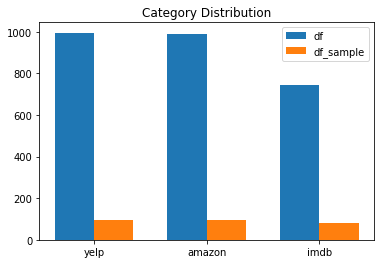

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots()

df_means = dict(df.category.value_counts())
df_sample_means = dict((df_sample.category.value_counts()))

if list(dict(df.category.value_counts()).keys()) != list(dict(df_sample.category.value_counts()).keys()):
    temp = {} 
    for key in list(dict(df.category.value_counts()).keys()): 
        temp.update({key:df_sample_means[key]})
    df_sample_means = temp

A = np.arange(len(df_means))
width = 0.35

bar1 = ax.bar(A - width/2, list(df_means.values()), width, label='df')
bar2 = ax.bar(A + width/2, list(df_sample_means.values()), width, label='df_sample')

plt.figure()
ax.set_title('Category Distribution')
ax.set_xticks(A)
ax.set_xticklabels(list(df_means.keys()))
ax.legend()
plt.show()

## Feature subset selection

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

In [11]:
df_counts.shape

(2731, 5155)

In [12]:
count_vect.get_feature_names()[0:30]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160']

Show a part of the document matrix. It can be seen that it is sparse.

In [13]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Plot a heat-map of the above document matrix.

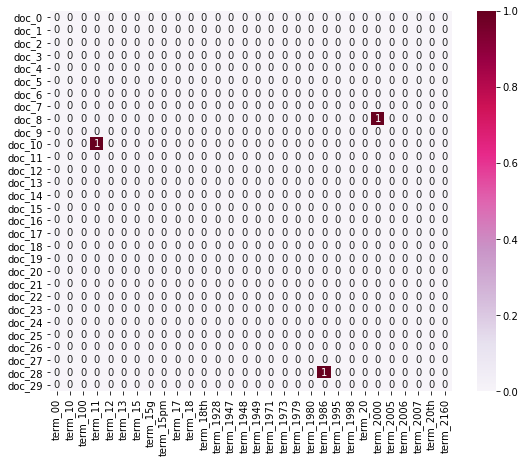

In [14]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]
plot_z = df_counts[30:60, 30:60].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Dimensionality Reduction

Do the PCA to the above sparse document matrix. Select the largest two eigenvalues.

In [15]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [16]:
df_reduced.shape

(2731, 2)

The scatter plot shows the category distribution after performing PCA.

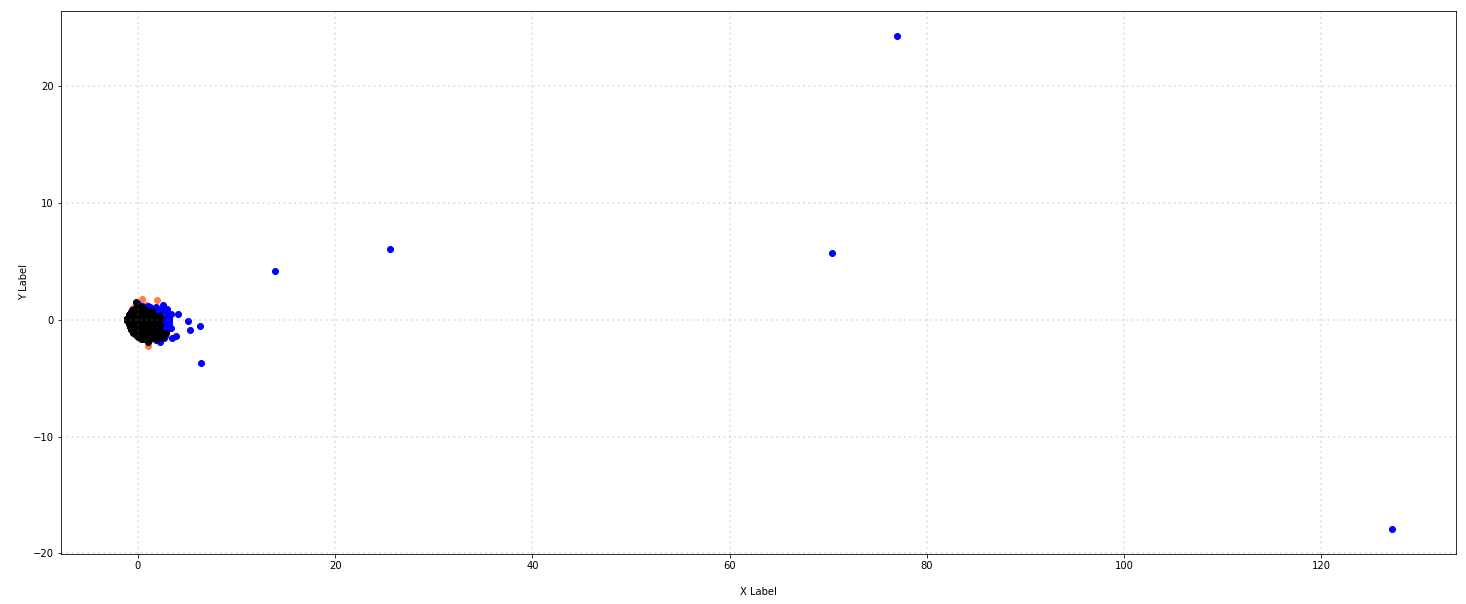

In [17]:
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, website):
    xs = df_reduced[df['category'] == category].T[0]
    ys = df_reduced[df['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Set n_components = 3 and then plot a 3D version.

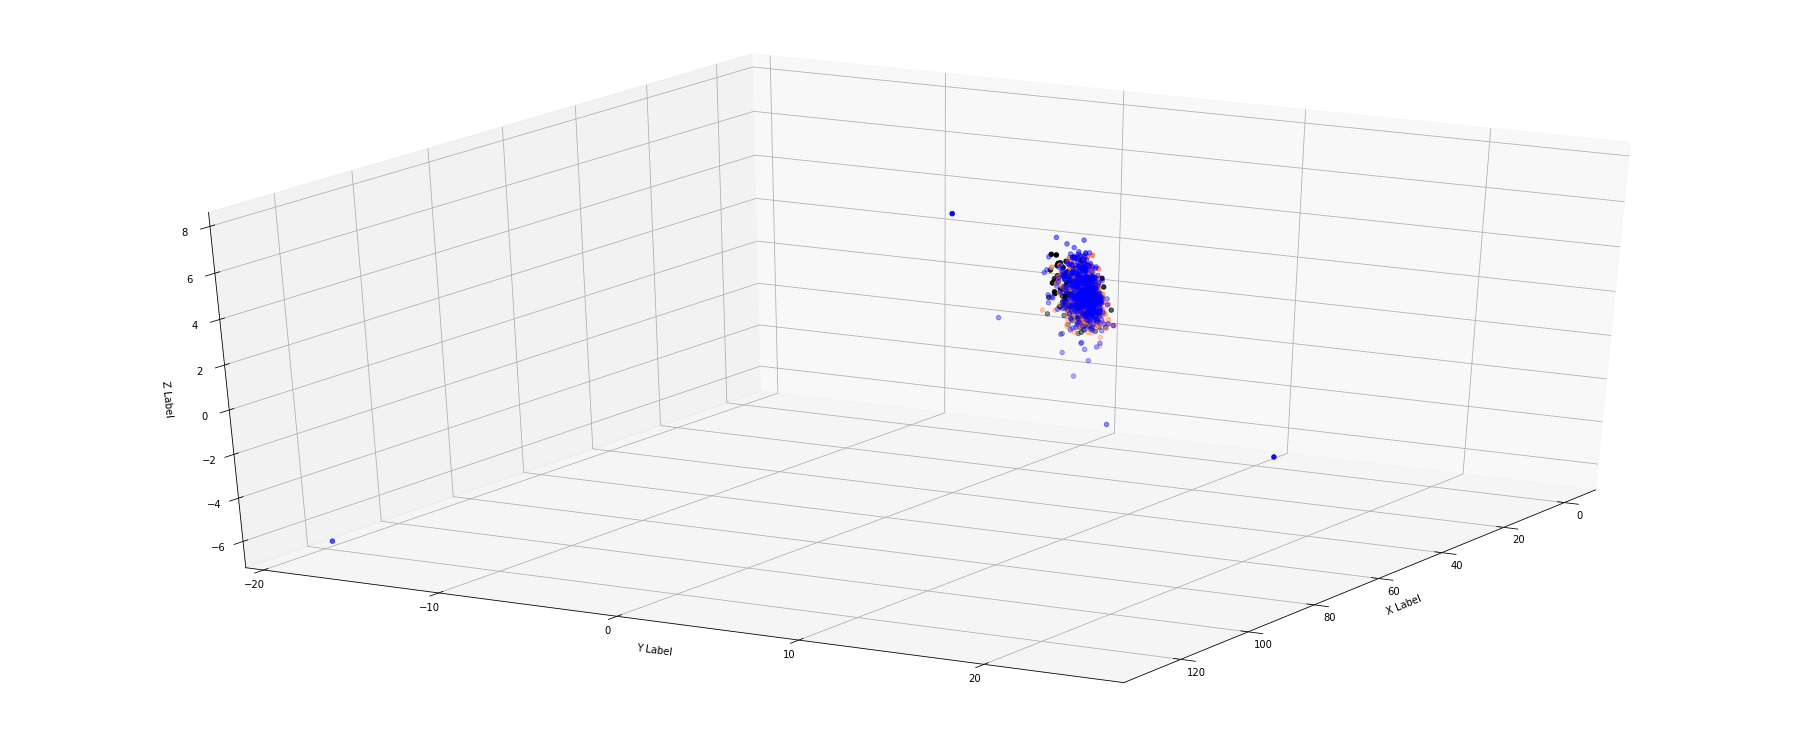

In [18]:
from mpl_toolkits.mplot3d import Axes3D
df_reduced3D = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black']


fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig,azim=30,elev=30)

for c, category in zip(col, website):
    xs = df_reduced3D[df['category'] == category].T[0]
    ys = df_reduced3D[df['category'] == category].T[1]
    zs = df_reduced3D[df['category'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## Atrribute Transformation / Aggregation

In [19]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

The below figure shows the term frequency of each word.

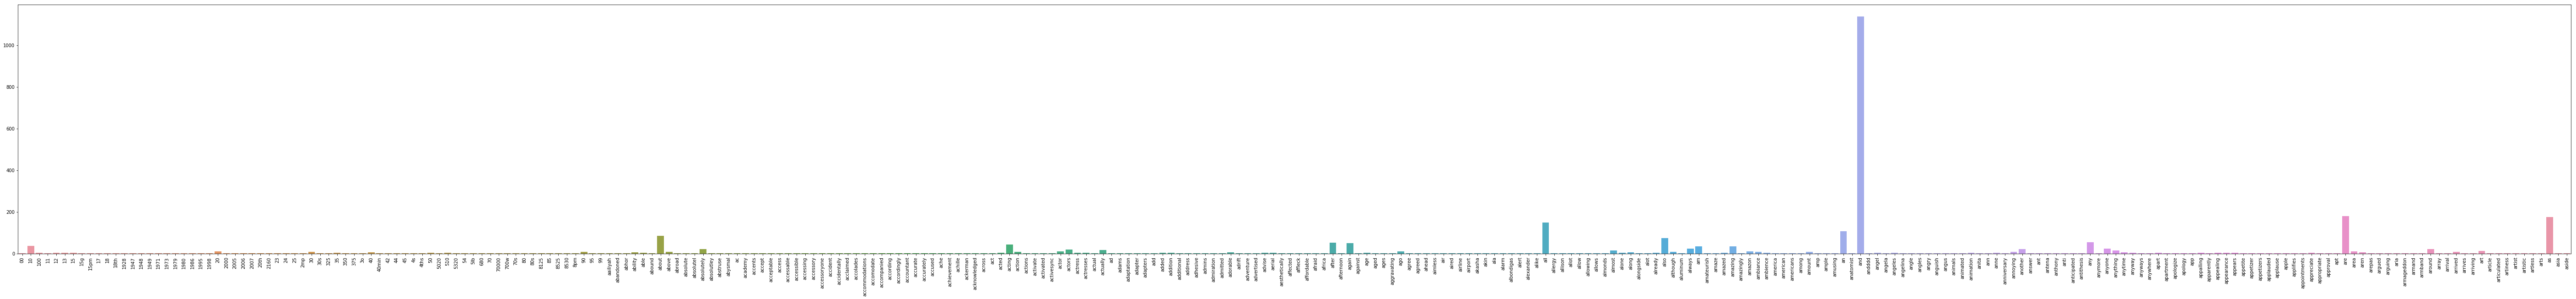

In [20]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Sort the term frequencies and plot again.

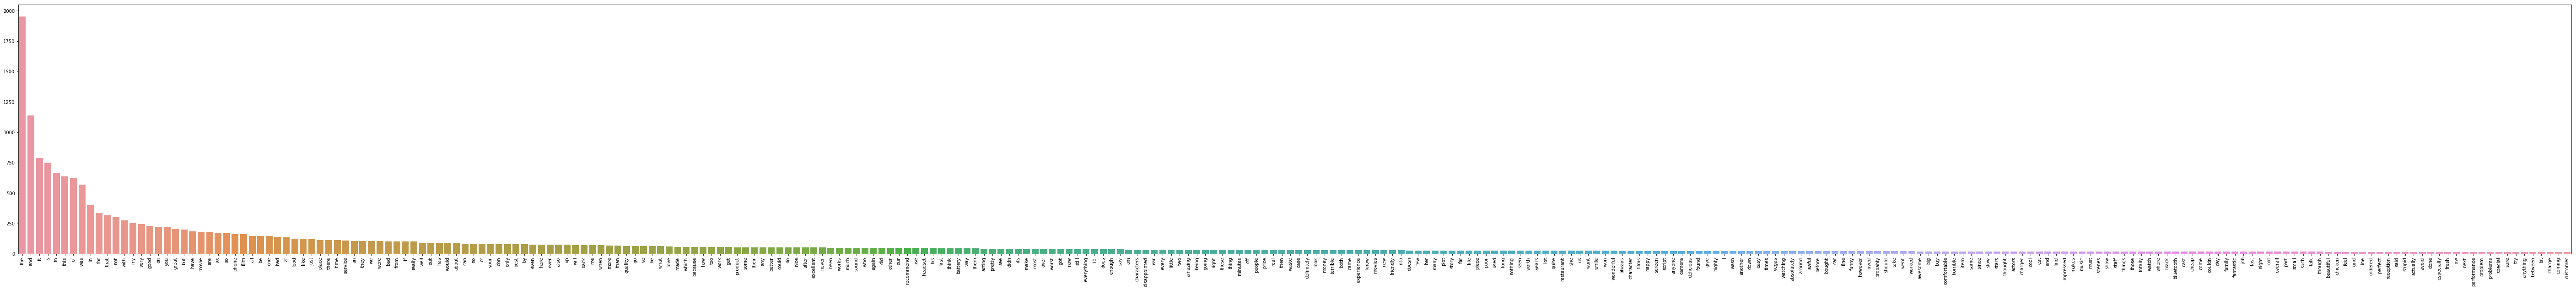

In [21]:
features = count_vect.get_feature_names()
frequencies = term_frequencies
d = dict(zip(features, frequencies))
result = sorted(d.items(), key=lambda d: d[1], reverse=True) 
sort_features = []
sort_frequencies = []
for i in result:
    sort_features.append(i[0])
    sort_frequencies.append(i[1])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x= sort_features[:300], 
            y=sort_frequencies[:300])
g.set_xticklabels(sort_features[:300], rotation = 90);

Since most term frequencies are low, taking log to stress these values.

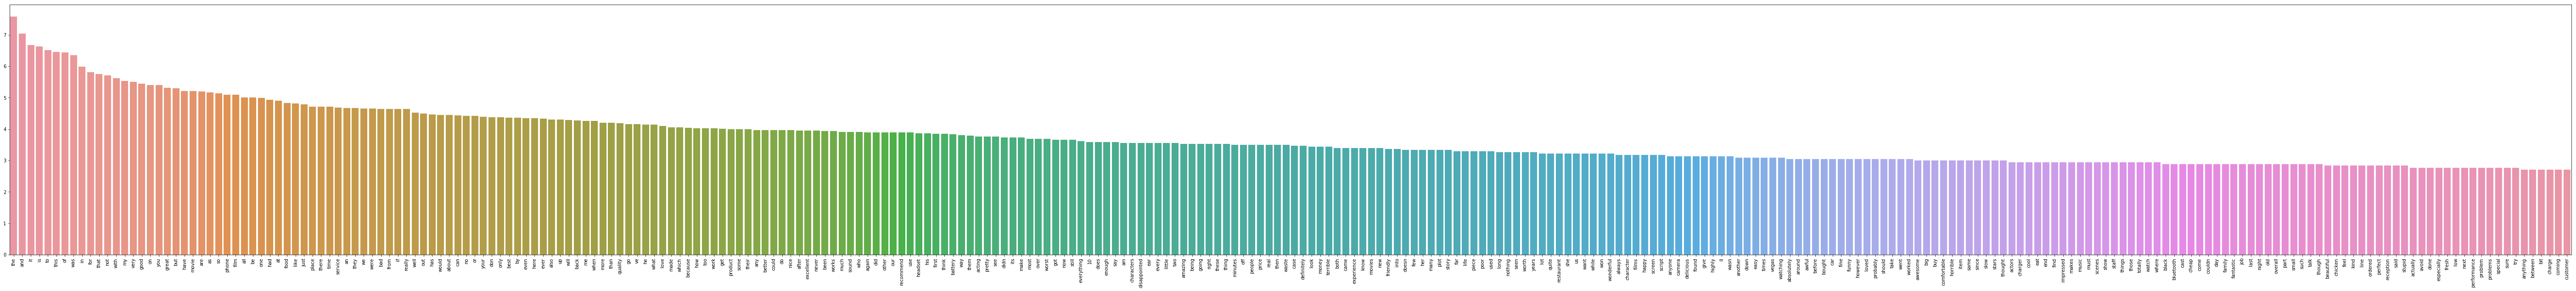

In [22]:
import math
sort_frequencies_log = [math.log(i) for i in sort_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sort_features[:300],
                y=sort_frequencies_log[:300])
g.set_xticklabels(sort_features[:300], rotation = 90);

## Discretization and Binarization

Binarize the category feature in this dataset to become bin_category feature.

In [23]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category)
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [24]:
df['bin_category'] = mlb.transform(df['category']).tolist()
df[0:10]

,text,label,category,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]"
9,What a waste of money and time!.,0,amazon,"[1, 0, 0]"


## Data Exploration

Apply cosine similarity to these three records extracted from the dataset after transforming them to count vectors.

In [25]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [26]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# 3. New Data Visualizations, TF-IDF Features, and Naive Bayes Classifier

First, A pie chart which visualize the category distribution is drwan below.

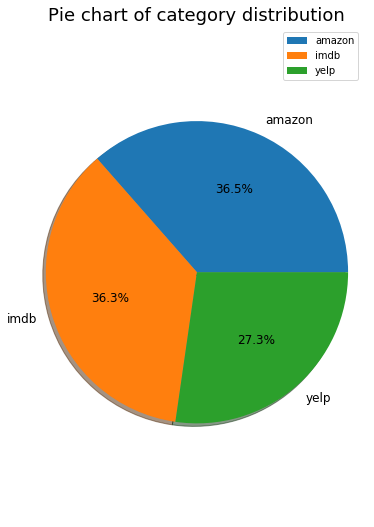

In [28]:
plt.figure(figsize=(6,9))

labels = website      # 製作圓餅圖的類別標籤
separeted = (0, 0, 0.3, 0, 0.3)                  # 依據類別數量，分別設定要突出的區塊
size = df.category.value_counts()                # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=True)                    # 設定陰影

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of category distribution", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

A box plot is shown below. It shows the log term frequencies appear in the text.

Text(0.5, 0, 'Log term frequencies')

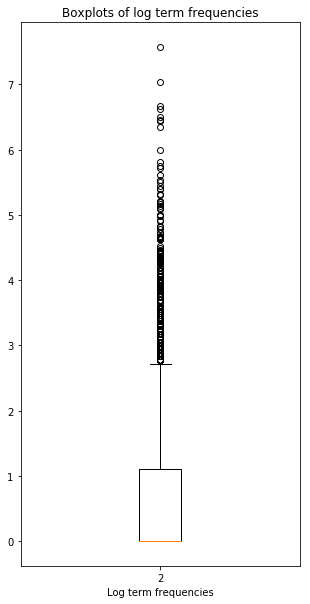

In [29]:
fig,axes = plt.subplots(figsize=(5,10))
axes.boxplot(x=sort_frequencies_log,positions=[2]) 
axes.set_title('Boxplots of log term frequencies')
axes.set_xlabel('Log term frequencies')

Then a wordcolud is presented below. The input is the text of this dataset, and the ouput figure shows the frequencies of the words,
after data preprocessing (stemming, tokenizing, removing stop words and so on). The larger the word is, the higher frequency the word will be.

(-0.5, 799.5, 599.5, -0.5)

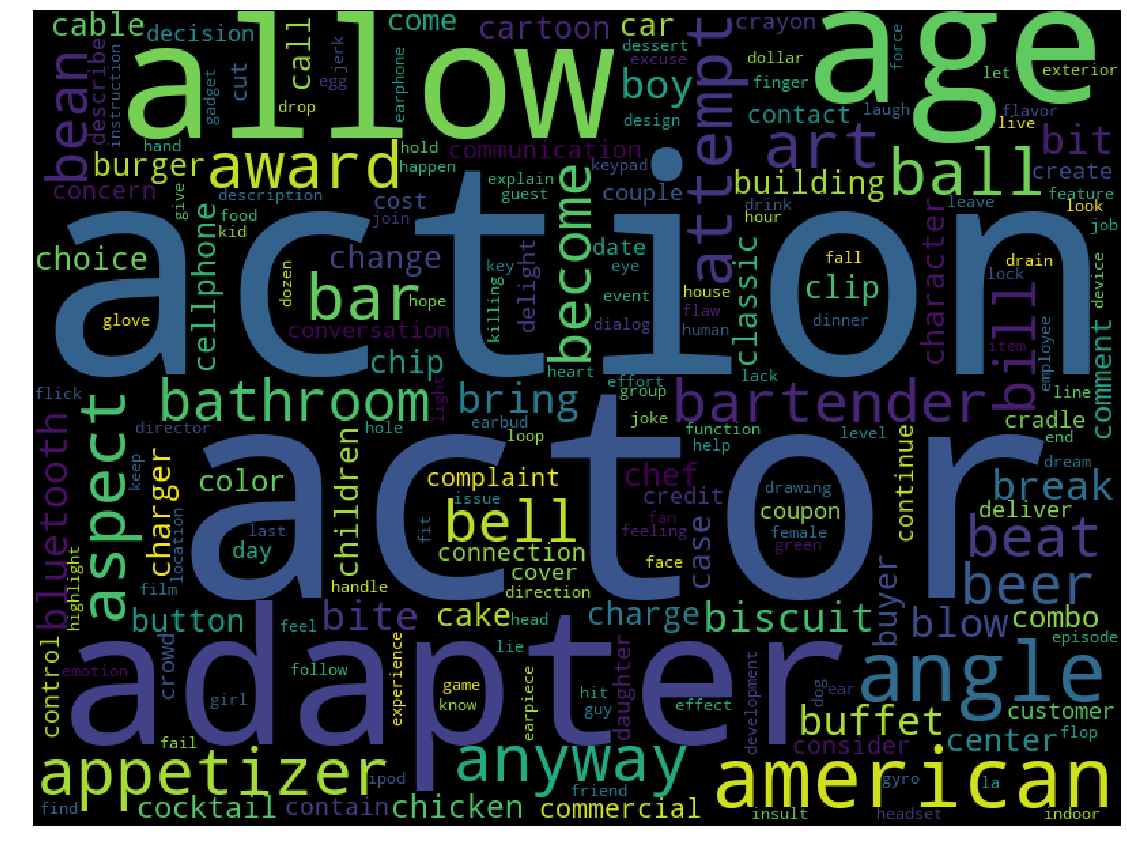

In [30]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(count_vect.get_feature_names()))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df.text
tfidf_vect = TfidfVectorizer()
weight = tfidf_vect.fit_transform(corpus)
print(weight)

  (0, 4161)	0.1864662529205632
  (0, 4545)	0.21024980596341533
  (0, 2427)	0.12237411553084601
  (0, 3043)	0.22349249598111057
  (0, 4987)	0.2479709534374588
  (0, 1829)	0.1561342689069018
  (0, 2809)	0.22836646536189842
  (0, 4609)	0.12773269765262837
  (0, 3387)	0.3069219728545535
  (0, 2432)	0.12092348822270316
  (0, 2314)	0.3008057081827911
  (0, 2158)	0.22091318490920203
  (0, 4531)	0.0880487508117654
  (0, 4835)	0.27340787912821807
  (0, 4793)	0.33039657521798205
  (0, 1982)	0.23061573681226907
  (0, 647)	0.22552149089185872
  (0, 1013)	0.39742476267065296
  (1, 1993)	0.33629203819538883
  (1, 713)	0.5115101511401507
  (1, 1603)	0.472269140255879
  (1, 4861)	0.6342135992620657
  (2, 1829)	0.35236413379973897
  (2, 4531)	0.1987085988818777
  (2, 2023)	0.40232185992144925
  :	:
  (2730, 4545)	0.15464316181772095
  (2730, 4609)	0.09395009018912755
  (2730, 2432)	0.08894177319735869
  (2730, 2314)	0.11062446786348006
  (2730, 4531)	0.19428513368523126
  (2730, 647)	0.1658758078256295

The first element of each tuple represents which record, and the second element represents the which word.
The most-right values stand for the TF-IDF weights.

In [32]:
count_vect.get_feature_names()[4987]

'way'

It can be seen that the most important word of the first record is 'way' because its TF-IDF is the largest.

Use word frequency features to build a classifier. 

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

def naive_bayes_tf_test():
    
    x_train, x_test, y_train, y_test = train_test_split(df.text,df.label,test_size=0.2)

    # Calculate tf
    x_train = count_vect.fit_transform(x_train)
    x_test = count_vect.transform(x_test)

    # Use naive bayes to classify data
    mlt = MultinomialNB(alpha=1.0)
    mlt.fit(x_train,y_train)
    y_predict = mlt.predict(x_test)

    print("Predicted labels：\n",y_predict)
    print("Accuracy：",mlt.score(x_test,y_test))

if __name__ == '__main__':
    naive_bayes_tf_test()

Predicted labels：
 [0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 0 0

Use TF-IDF features to build another classifier.

In [34]:
def naive_bayes_tfidf_test():
    
    x_train, x_test, y_train, y_test = train_test_split(df.text,df.label,test_size=0.2)

    # Calculate tf-idf
    x_train = tfidf_vect.fit_transform(x_train)
    x_test = tfidf_vect.transform(x_test)

    # Use naive bayes to classify data
    mlt = MultinomialNB(alpha=1.0)
    mlt.fit(x_train,y_train)
    y_predict = mlt.predict(x_test)

    print("Predicted labels：\n",y_predict)
    print("Accuracy：",mlt.score(x_test,y_test))

if __name__ == '__main__':
    naive_bayes_tfidf_test()

Predicted labels：
 [1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 1 0 0

In both cases, the training set: the test set = 8:2. It can be observed that the accuracy goes higher when the
the proportion of the training set becomes larger. However, it's hard to reach over 0.9 since the size of dataset can not get larger.  
The results show that using TF-IDF features is nearly the same as using word frequency features. Sometimes the former accuracy is higher than the latter, but sometimes it doesn't. 

# 4. Comments

What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

### Answer here

I noticed that in the Lab1 notebook, dataframe[index] is the way that frequently used to extract the first few records.
This seems to be inefficient, I suggest to use dataframe.head() istead. Another thing I observed is that there are some cells with no output. In order to be more succinct, merging the related cells together will be a decent solution. 